Define paths

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks




import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
cmap = cm.Spectral_r
from sklearn import preprocessing

Define variables and upload data for figures

In [19]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'

L=500; dx =1; J = int(L/dx)
T =3000; dt = 0.2; N = int(T/dt)
boundaryCoeff=2;rate=0.1
# filename='%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%s_J%s_T%s_N%s'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
parID_list = pickle.load(open( modellingpath + '/growth/out/numerical/%s/%s/simulation/parID_list_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), "rb" ) )


Plot solution U with peaks

In [57]:
def plot1D(U,morphogen='both', savefig=False,filename='',savefigpath='',pad=0.001,round=False, plotPeaks=False, peaks=False):
    if round==True:
        U = np.round(U,decimals=3)
    if morphogen == 0:
        plt.plot(U[0], label='U')
    if morphogen ==1: 
        plt.plot(U[1], label='V')
    if morphogen == 'both': 
        fig,ax = plt.subplots()
        ax.plot(U[0], label='U', color='blue')
        ax.set_ylim(np.amin(U[0])-pad, np.amax(U[0])+pad)
        ax.legend(loc=2) #upper left
        ax.ticklabel_format(useOffset=False)

        ax2=ax.twinx()
        ax2.plot(U[1], label='V', color='red')
        ax2.set_ylim(np.amin(U[1])-pad, np.amax(U[1])+pad)
        ax2.legend(loc=1) #upper right

        ax.ticklabel_format(useOffset=False)
        if plotPeaks==True:
            ax.plot(peaks[0],U[0][peaks[0]], 'o', color='blue')
            ax2.plot(peaks[1],U[1][peaks[1]], 'o', color='red')



    plt.ticklabel_format(useOffset=False)
    plt.xlabel('Space')
    plt.ylabel('Concentration')
    if savefig==True:
        plt.savefig('%s%s.jpeg'%(savefigpath,filename))
    else:
        plt.show()

In [58]:
def countPeaks(U, showplot1D=True):
    peaks = [0,0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)
    print(peaks)
    plot1D(U,plotPeaks=True, peaks=peaks)
    
    return peaks
    


In [59]:



def stdPeakDist(U, showplot1D=True,printStd=True):
    peaks = countPeaks(U, showplot1D=showplot1D)
    #calculate distance between peaks
    peak0 = peaks[0]
    #calculate distance between peaks in peak0
    std=[0,0]
    for count,peak in enumerate(peaks):
        if len(peak)>1:
            peak_dist = [(peak[i+1] - peak[i]) for i in range(len(peak)-1)]
            # print(peak_dist)
            # peak_dist = [np.linalg.norm(peak[i]-peak[i+1]) for i in range(len(peak)-1)]
            normalised_peak_dist = peak_dist/np.sum(peak_dist)
            # print(normalised_peak_dist)
            std[count] = np.std(normalised_peak_dist)

        else:
            std[count] = 1
    if printStd==True:
        print(std)

    return std

[array([], dtype=int64), array([], dtype=int64)]


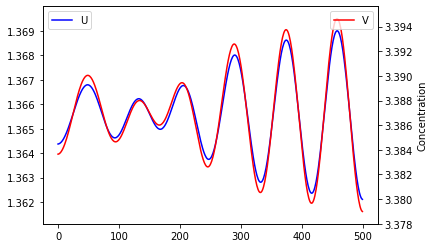

[1, 1]
[array([], dtype=int64), array([], dtype=int64)]


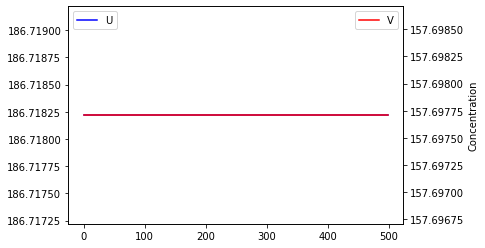

[1, 1]
[array([ 11,  22,  33,  44,  55,  67,  78,  89, 100, 111, 122, 133, 145,
       156, 167, 178, 189, 200, 211, 222, 233, 245, 256, 267, 278, 289,
       300, 311, 322, 333, 344, 355, 366, 377, 388, 400, 411, 422, 433,
       444, 455, 466, 477, 488]), array([ 11,  22,  33,  44,  55,  67,  78,  89, 100, 111, 122, 133, 145,
       156, 167, 178, 189, 200, 211, 222, 233, 245, 256, 267, 278, 289,
       300, 311, 322, 333, 344, 355, 366, 377, 388, 400, 411, 422, 433,
       444, 455, 466, 477, 488])]


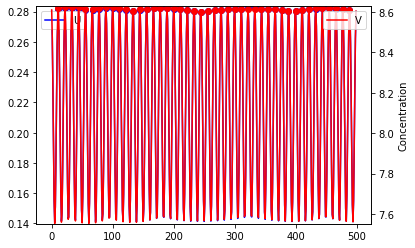

[0.0006089413483885138, 0.0006089413483885138]
[array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 101, 111, 121, 131,
       141, 151, 161, 170, 180, 190, 200, 209, 219, 229, 238, 248, 258,
       267, 277, 286, 296, 305, 315, 324, 334, 343, 353, 362, 372, 381,
       391, 400, 410, 419, 429, 438, 447, 457, 466, 476, 485, 495]), array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 101, 111, 121, 131,
       141, 151, 161, 170, 180, 190, 200, 209, 219, 229, 238, 248, 258,
       267, 277, 286, 296, 305, 315, 324, 334, 343, 353, 362, 372, 381,
       391, 400, 410, 419, 429, 438, 447, 457, 466, 476, 485, 495])]


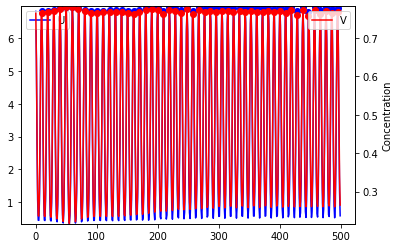

[0.0010309278350515462, 0.0010309278350515462]
[array([], dtype=int64), array([], dtype=int64)]


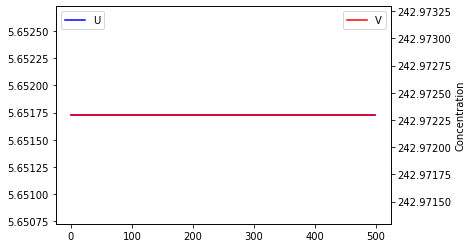

[1, 1]
[array([ 10,  20,  30,  40,  50,  60,  70,  80,  91, 101, 111, 122, 132,
       142, 152, 163, 173, 183, 194, 204, 215, 225, 236, 246, 257, 267,
       278, 289, 299, 310, 320, 331, 341, 351, 361, 372, 382, 392, 402,
       412, 423, 433, 443, 453, 464, 474, 484, 494]), array([ 10,  20,  30,  40,  50,  60,  70,  80,  91, 101, 111, 122, 132,
       142, 152, 163, 173, 183, 194, 204, 215, 225, 236, 246, 257, 267,
       278, 289, 299, 310, 320, 331, 341, 351, 361, 372, 382, 392, 402,
       412, 423, 433, 443, 453, 464, 474, 484, 494])]


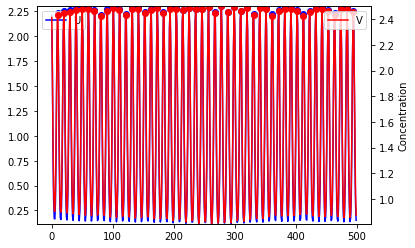

[0.0009448824186831668, 0.0009448824186831668]
[array([  7,  15,  22,  30,  37,  45,  52,  59,  67,  74,  82,  89,  97,
       104, 112, 119, 127, 134, 141, 147, 154, 162, 169, 177, 184, 191,
       196, 203, 211, 217, 225, 232, 240, 248, 255, 263, 270, 278, 284,
       291, 299, 306, 314, 321, 327, 335, 342, 350, 357, 363, 371, 378,
       383, 389, 396, 404, 411, 417, 425, 431, 438, 446, 453, 458, 466,
       471, 478, 486, 493]), array([  7,  15,  22,  30,  37,  45,  52,  59,  67,  74,  82,  89,  97,
       104, 112, 119, 127, 134, 141, 147, 154, 162, 169, 177, 184, 191,
       196, 203, 211, 217, 225, 232, 240, 248, 255, 263, 270, 278, 284,
       291, 299, 306, 314, 321, 327, 335, 342, 350, 357, 363, 371, 378,
       383, 389, 396, 404, 411, 417, 425, 431, 438, 446, 453, 458, 466,
       471, 478, 486, 493])]


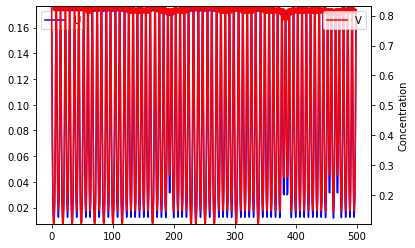

[0.0017382481985409196, 0.0017382481985409196]
[array([], dtype=int64), array([], dtype=int64)]


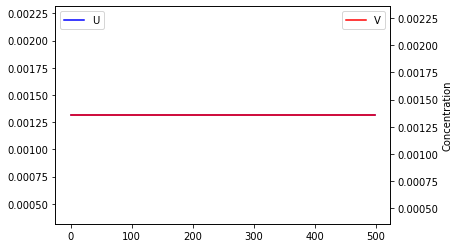

[1, 1]
[array([], dtype=int64), array([], dtype=int64)]


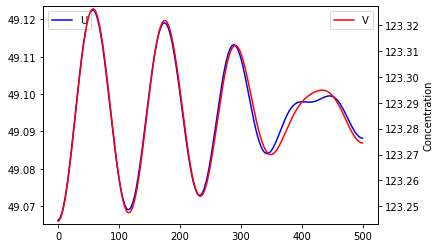

[1, 1]
[array([], dtype=int64), array([ 57,  98, 141, 183, 226, 269, 311, 353, 395, 437, 479])]


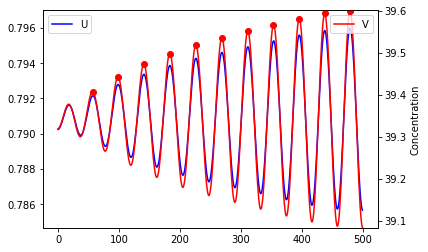

[1, 0.0014218009478672966]
[array([], dtype=int64), array([], dtype=int64)]


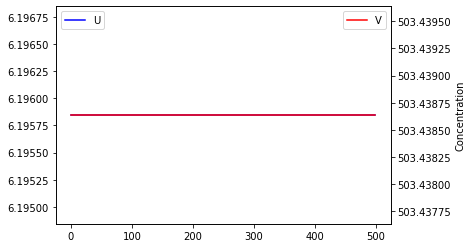

[1, 1]
[array([], dtype=int64), array([], dtype=int64)]


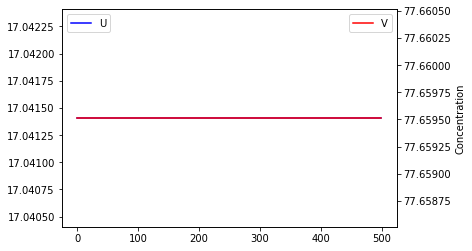

[1, 1]
[array([ 10,  20,  29,  38,  47,  57,  68,  79,  90, 101, 112, 123, 134,
       144, 155, 165, 174, 182, 191, 201, 211, 222, 233, 245, 256, 267,
       278, 288, 297, 305, 314, 323, 332, 342, 353, 363, 373, 383, 392,
       402, 413, 424, 436, 449, 462, 474, 486]), array([ 10,  20,  29,  38,  47,  57,  68,  79,  90, 101, 112, 123, 134,
       144, 155, 165, 174, 182, 191, 201, 211, 222, 233, 245, 256, 267,
       278, 288, 297, 305, 314, 323, 332, 342, 353, 363, 373, 383, 392,
       402, 413, 424, 436, 449, 462, 474, 486])]


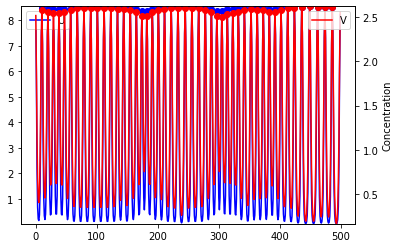

[0.002447526672812252, 0.002447526672812252]
[array([  8,  24,  40,  56,  73,  89, 105, 121, 137, 153, 169, 185, 201,
       217, 233, 249, 265, 281, 297, 314, 330, 347, 363, 380, 397, 415,
       432, 449, 466, 483]), array([  8,  24,  40,  56,  73,  89, 105, 121, 137, 153, 169, 185, 201,
       217, 233, 249, 265, 281, 297, 314, 330, 347, 363, 380, 397, 415,
       432, 449, 466, 483])]


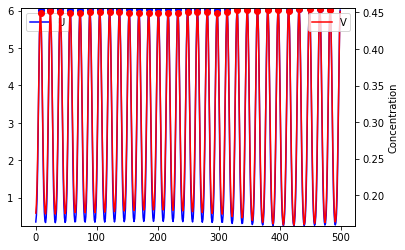

[0.001161524500907441, 0.001161524500907441]
[array([ 13,  39,  65,  91, 117, 143, 169, 195, 221, 247, 273, 300, 326,
       353, 379, 406, 432, 459, 486]), array([ 13,  39,  65,  91, 117, 143, 169, 195, 221, 247, 273, 300, 326,
       353, 379, 406, 432, 459, 486])]


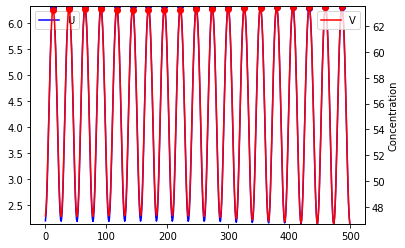

[0.0009469412436338456, 0.0009469412436338456]
[array([ 21,  42,  63,  84, 105, 126, 147, 168, 188, 208, 227, 246, 265,
       283, 301, 319, 338, 356, 375, 394, 413, 432, 451, 470, 490]), array([ 21,  42,  63,  84, 105, 126, 147, 168, 188, 208, 227, 246, 265,
       283, 301, 319, 338, 356, 375, 394, 413, 432, 451, 470, 490])]


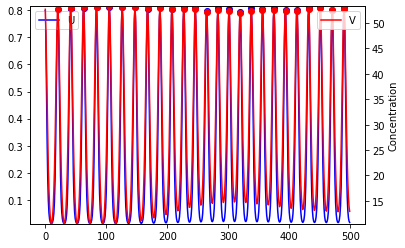

[0.0023013208683348627, 0.0023013208683348627]
[array([291]), array([ 55, 169, 291, 425])]


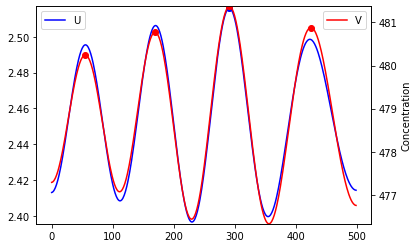

[1, 0.02221410451520352]
[array([  9,  39,  62, 122, 145, 164, 202, 221, 238, 263, 296, 324, 353,
       381, 409, 436, 463, 488]), array([ 12,  36,  64, 117, 150, 197, 239, 265, 296, 324, 353, 381, 409,
       436, 463, 488])]


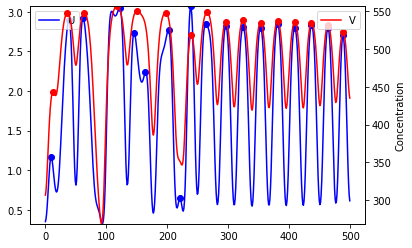

[0.019652615368885927, 0.017484018525856848]
[array([], dtype=int64), array([], dtype=int64)]


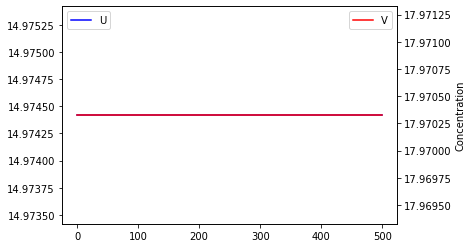

[1, 1]
[array([ 12,  25,  38,  51,  64,  77,  90, 103, 116, 129, 142, 155, 168,
       181, 195, 208, 221, 234, 248, 261, 274, 288, 301, 315, 328, 342,
       355, 369, 382, 395, 409, 422, 435, 448, 461, 474, 487]), array([ 12,  25,  38,  51,  64,  77,  90, 103, 116, 129, 142, 155, 168,
       181, 195, 208, 221, 234, 248, 261, 274, 288, 301, 315, 328, 342,
       355, 369, 382, 395, 409, 422, 435, 448, 461, 474, 487])]


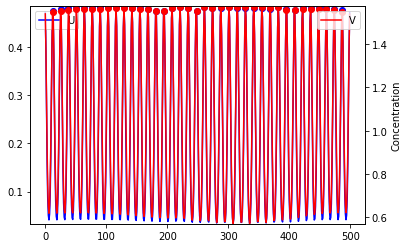

[0.0008332050788757307, 0.0008332050788757307]
[array([ 17,  52,  86, 121, 155, 189, 224, 259, 294, 330, 367, 404, 442,
       480]), array([ 17,  52,  86, 121, 155, 189, 224, 259, 294, 330, 366, 404, 442,
       480])]


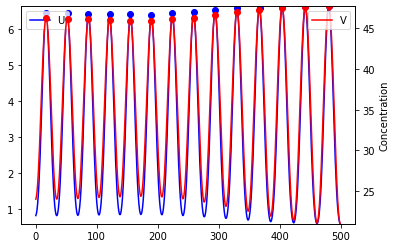

[0.0029997458191174248, 0.0031170731083724383]
[array([], dtype=int64), array([], dtype=int64)]


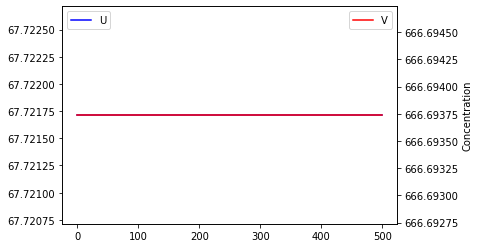

[1, 1]
[array([], dtype=int64), array([], dtype=int64)]


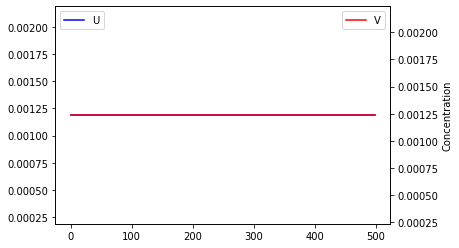

[1, 1]
[array([], dtype=int64), array([], dtype=int64)]


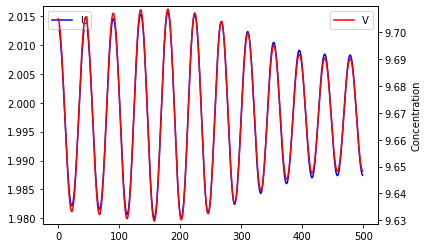

[1, 1]
[array([  7,  15,  23,  31,  39,  48,  57,  65,  74,  82,  89,  97, 105,
       112, 120, 128, 137, 146, 155, 165, 174, 183, 192, 200, 209, 217,
       225, 232, 240, 248, 256, 264, 272, 280, 289, 297, 306, 315, 324,
       333, 342, 350, 358, 367, 375, 384, 393, 402, 410, 419, 428, 437,
       446, 455, 463, 471, 479, 487, 495]), array([  7,  15,  23,  31,  39,  48,  57,  65,  74,  82,  89,  97, 105,
       112, 120, 128, 137, 146, 155, 165, 174, 183, 192, 200, 209, 217,
       225, 232, 240, 248, 256, 264, 272, 280, 289, 297, 306, 315, 324,
       333, 342, 350, 358, 367, 375, 384, 393, 402, 410, 419, 428, 437,
       446, 455, 463, 471, 479, 487, 495])]


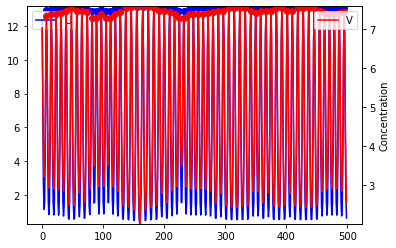

[0.0012640293824193265, 0.0012640293824193265]
[array([ 11,  23,  34,  45,  57,  68,  80,  91, 103, 115, 127, 139, 152,
       164, 176, 187, 199, 211, 223, 235, 247, 259, 272, 286, 300, 314,
       329, 343, 357, 371, 385, 398, 412, 425, 439, 453, 468, 484]), array([ 11,  23,  34,  45,  57,  68,  80,  91, 103, 115, 127, 139, 152,
       164, 176, 187, 199, 211, 223, 235, 247, 259, 272, 286, 300, 314,
       329, 343, 357, 371, 385, 398, 412, 425, 439, 453, 468, 484])]


KeyboardInterrupt: 

In [60]:
for parID in parID_list:
    U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parID)), 'rb'))
    # countPeaks(U_final)
    stdPeakDist(U_final)

In [5]:
parID=41018
U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
n_peaks=[]
position_peaks = []
for count,UX_snapshot in enumerate(U_record[0][-20:]):
    peaks, _ = find_peaks(UX_snapshot, prominence=0.1)
    n_peaks.append(len(peaks))
    position_peaks.append(peaks)

if all(x==n_peaks[0] for x in n_peaks):
    print('constant number of peaks')

if np.all([x==position_peaks[0] for x in position_peaks]):
    print('constant position peaks')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mo2016/Documents/modelling/growth/out/numerical/turinghill/nogrowth/data/2Dfinal_turinghill_variant0_nogrowth_ID41018_L50_J250_T500_N12500.pkl'

In [25]:
dx = float(L)/float(J-1)

x_grid = np.array([j*dx for j in range(J)])
reduced_t_grid = np.arange(0,T,10) 

surfpattern(U_record, grids=[x_grid,reduced_t_grid], growth='linear',morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False,L=L,J=J,T=T,record_every_x_hours=10)



TypeError: surfpattern() got an unexpected keyword argument 'L'

[array([], dtype=int64), array([], dtype=int64)]
morphogen = both
show


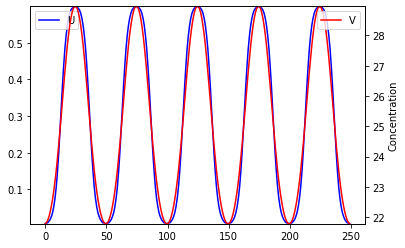

[1, 1]


In [9]:

parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


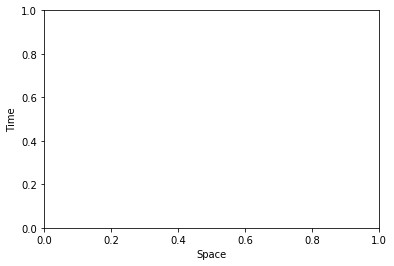

[1, 1]


In [8]:
parID=30997
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)


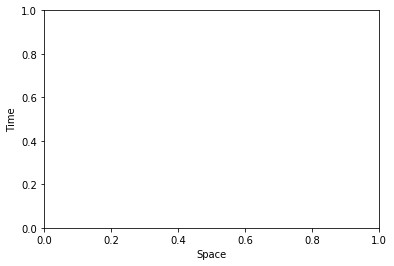

[1, 1]


In [9]:
parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)
